In [ ]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt

In [ ]:
class Tree:  
  '''
  A Tree object is a python representation of a user defined species of tree
  found on Earth. 
  Each instance holds all of the user defined attributes of a species and can
  generate those individual trees from there. 

  '''
    
  def __init__(self, dic):
    '''
    Initializes a Tree object.

    Parameters
    ----------
    dic : dict
          A dictionary of all of the important characteristic of 
          the tree species.
    minimum keys requirements:
        Scientific Name : str
          The scientific name is needed for internal reasons.

        Growth rate by year : dict 
          The growth rate of each species by year. Can be an array of 
          possible growth rates for each year. Should be in the form 
          {'1': [1,2,3], '2': [4]} etc. Units should be in m^3 per year. 

        Carbon sequestering rate : list
          The carbon sequestering rate as a function of year of age.
  
    Returns
    -------
    A Tree object.
    '''
    self.data = dic

  def populateTree(self, age):
    '''
    Gives the Tree object definitive properties.

    Parameters
    ----------
    age : int
        The desired age of the tree as an integer. 
  
    Returns
    -------
    A Tree object with calculated height, radius, volume, and carbon storage.
    '''
    height = 0
    radius = 0
    storage = 0
    if age > 0:
      for year in range(age):
        hgrow = self.data['Growth rate by year']['height'][f'{year+1}']
        height += choice(hgrow)
        rgrow = self.data['Growth rate by year']['radius'][f'{year+1}']
        radius += choice(rgrow)
        crate = self.data['Carbon sequestering rate'][f'{year+1}']
        storage += choice(crate)
    volume = np.pi*radius**2*height
    self.data['height'] = height
    self.data['radius'] = radius
    self.data['volume'] = volume
    self.storage = storage
    self.age = age

class Forest:
  '''
  A Forest object is a python representation of a user defined collection of 
  trees found on Earth. Forests can contain different species of trees, 
  running total of carbon stored in the trees, running total of carbon stored 
  in the lumber products, total volume of harvested lumber, and allow users to
  see the effects of different harveesting techniques.

  '''
    
  def __init__(self):
    '''
    Initializes a Forest object. 
    No inputs.
    '''
    self.forest = list()
    self.species = {}
    self.storage = 0
    self.products = 0
    self.productStorage = 0

  def addSpecies(self, dic):
    '''
    Initializes a Tree object.

    Parameters
    ----------
    dic : dict
          A dictionary of all of the important characteristic of 
          the tree species.
    minimum keys requirements:
        Scientific Name : str
          The scientific name is needed for internal reasons.

        Growth rate by year : dict 
          The growth rate of each species by year. Can be an array of 
          possible growth rates for each year. Should be in the form 
          {'1': [1,2,3], '2': [4]} etc. Units should be in m^3 per year. 

        Carbon sequestering rate : list
          The carbon sequestering rate as a function of year of age.
  
    Returns
    -------
    Returns a Forest object with a new species added to its repertoire. 
    If the input dictionary has a common name, the tree species will also be
    accessible under that common name.
    '''
    name = dic['Scientific Name']
    tree = dic
    self.species[name] = tree
    try:
      common = dic['Common Name']
      self.species[common] = tree
    except:
      pass
    
  def addTrees(self, ages, species='Pseudotsuga menziesii', common_name=False):
    '''
    Adds Trees of a given species and given ages to the Forest object.

    Parameters
    ----------
    ages : list
          A list of all of the ages (in integer years) of the trees.

    species : str
          The scientific name of the desired tree species. Optional if common 
          name was previously provided.

    common_name : str
          The common name of the species can be used instead of the scientific
          name if it was previously provided. The common name takes precedence. 
        
    Returns
    -------
    Updates the Forest object to have trees of the specified ages and species.
    Adds to the Forest object's overall carbon stored. 
    '''
    if common_name:
      name = common_name
    else:
      name = species
    treeType = self.species[name]
    for age in ages:
      tree = Tree(treeType)
      tree.populateTree(age)
      self.storage += tree.storage
      self.forest.append(tree)

  def ageForest(self,years):
    '''
    Ages the entire Forest at once and updates relevant attributes.

    Parameters
    ----------
    years : int
          The desired number of years since the trees were initialized.
        
    Returns
    -------
    Updated Forest object.
    '''
    for tree in self.forest:
      growth = tree.data['Growth rate by year']
      for year in range(1,years+1):
        tree.age += 1
        age = tree.age
        try:
          tree.data['height'] += choice(growth['height'][f'{age}'])
          tree.data['radius'] += choice(growth['radius'][f'{age}'])
          crate = tree.data['Carbon sequestering rate'][f'{age}']
          store = choice(crate)
          tree.storage += store
          self.storage += store
        except:
          tree.data['height'] += 0
          tree.data['radius'] += 0
          tree.storage += 0 
      tree.data['volume'] = np.pi*tree.data['radius']**2*tree.data['height']

  def removeTree(self, deletion):
    '''
    Removes desired tree. Intended for mistakenly uploaded Trees and 
    internal use.

    Parameters
    ----------
    deletion : Tree object
          The Tree to be removed.
        
    Returns
    -------
    Updated Forest object.
    '''
    self.storage -= deletion.storage
    self.forest.remove(deletion)

  def makeProduct(self, deletion):
    '''
    Removes desired tree specifically through harvesting.
    Updates the values of the forest products.
    Assumes a new tree is immediately planted.

    Parameters
    ----------
    deletion : Tree object
          The Tree to be removed.
        
    Returns
    -------
    Updated Forest object.
    '''
    self.products += deletion.data['volume']
    self.productStorage += deletion.storage
    species = deletion.data['Scientific Name']
    self.addTrees(0, species=species)
    self.removeTree(deletion)

  def constantYield(self, amt):

    '''
    Removes trees through harvesting at a constant rate (yield).

    Parameters
    ----------
    amt : int
          The number of trees to be harvested in a given year.
        
    Returns
    -------
    Updated Forest object.
    '''
    for tree in range(amt):
      index = np.argmax([x.age for x in self.forest])
      oldest = self.forest[index]
      self.makeProduct(oldest)

  def constantEffort(self,effort):
    '''
    Removes trees through harvesting at a constant rate (yield).

    Parameters
    ----------
    effort : float
          The percentage of the number of trees to be harvested 
          in a given year.
          Effort should be between 0 and 1. Effort cannot be negative
          or greater than 1.
        
    Returns
    -------
    Updated Forest object.
    '''
    old_trees = [x.age for x in self.forest if x.age>=7]
    amt = int(effort*len(old_trees))
    for tree in range(amt):
      index = np.argmax([x.age for x in self.forest])
      oldest = self.forest[index]
      self.makeProduct(oldest)

  def harvestRates(self, rate, amt, effort=False):
    '''
    Removes trees through harvesting at a specified rate in the 
    specified manner over a 100 year scale.

    Parameters
    ----------
    rate : int
          The number of years of the harvest cycle. 

    amt : int OR float
          If constant yield harvesting, this is the desired yield as an int.
          If constant effort harvesting, this is the desired effort as a float.

    effort : Bool
          Specifies whether or not this is constant effort harvesting.
        
    Returns
    -------
    Updated Forest object.
    '''
    for year in range(100):
      self.ageForest(1)
      if year % rate == 0:
        try:
          if effort:
            self.constantEffort(amt)
          else:
            self.constantYield(amt)
        except:
          pass


  def printForest(self):
    '''
    Prints out the characteristics of the trees and of the carbon.
    '''
    for x in self.forest:
      print(f"Age: {x.age}, Carbon: {x.storage}")
    print(f'Total carbon stored is {self.storage} units in the trees,')
    print(f'{self.productStorage} units in the products, and ')
    print(f'{self.productStorage+self.storage} units overall.')

  def printForest(self):
    '''
    Prints out the characteristics of the trees and of the carbon.
    '''
    for x in self.forest:
      print(f"Age: {x.age}, Carbon: {x.storage}")
    print(f'Total carbon stored is {self.storage} units in the trees,')
    print(f'{self.productStorage} units in the products, and ')
    print(f'{self.productStorage+self.storage} units overall.')




In [ ]:
#test case, random data for plotting storage as a function of harvest rate
douglas_fir = {'Common Name': 'Douglas-Fir',
               'Scientific Name': 'Pseudotsuga menziesii',
               'Growth rate by year': 
               {'height': {'1': 0.1*np.random.rand(9),
                           '2': np.random.rand(9),
                           '3': 3*np.random.rand(9),
                           '4': 3*np.random.rand(9),
                           '5': 3*np.random.rand(9),
                           '6': 3*np.random.rand(9),
                           '7': 4*np.random.rand(9),
                           '8': 4*np.random.rand(9),
                           '9': 4*np.random.rand(9),
                           '10': 3*np.random.rand(9),
                           '11': 3*np.random.rand(9),
                           '12': 2*np.random.rand(9),
                           '13': 2*np.random.rand(9),
                           '14': np.random.rand(9)},
                'radius': {'1': 0.001*np.random.rand(9),
                           '2': 0.001*np.random.rand(9),
                           '3': 0.001*3*np.random.rand(9),
                           '4': 0.001*3*np.random.rand(9),
                           '5': 0.001*3*np.random.rand(9),
                           '6': 0.001*3*np.random.rand(9),
                           '7': 0.001*4*np.random.rand(9),
                           '8': 0.001*4*np.random.rand(9),
                           '9': 0.001*4*np.random.rand(9),
                           '10': 0.001*3*np.random.rand(9),
                           '11': 0.001*3*np.random.rand(9),
                           '12': 0.001*2*np.random.rand(9),
                           '13': 0.001*2*np.random.rand(9),
                           '14': 0.001*np.random.rand(9)}},
               'Carbon sequestering rate': {'1': [10,23,34], '2': [50,75,97], 
                                            '3': [68,97,56], '4': [43,64,84], 
                                            '5': [53,84,90], '6': [72,89,93], 
                                            '7': [89,97,132], '8': [87,95,113], 
                                            '9': [112,132,143], '10': [121,134],
                                            '11': [89,93,112], '12': [57,68,92], 
                                            '13': [12,21,36], '14': [18,16,17], 
                                            '15': [1,2,3,4], '16': [1,1,2,0,4], 
                                            '17': [1,1,2,4], '18': [1,1,4,4,3], 
                                            '19': [1,0,1,0], '20': [1,0,2,1,2]}
               }
ages = np.random.randint(0,high=10,size=1000)
totalStorageByRate = list()
totalProductStorageByRate = list()
totalUnitsByRate = list()
years = range(20)
for x in years:
  cali = Forest()
  cali.addSpecies(douglas_fir)
  cali.addTrees(ages,common_name='Douglas-Fir')
  cali.harvestRates(x+1, 100, effort=False)
  totalStorageByRate.append(cali.storage)
  totalProductStorageByRate.append(cali.productStorage)
  totalUnitsByRate.append(cali.productStorage+cali.storage)

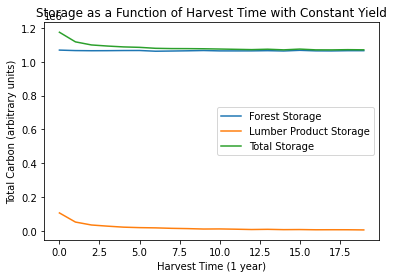

In [ ]:
plt.plot(years, totalStorageByRate, label="Forest Storage")
plt.plot(years, totalProductStorageByRate, label="Lumber Product Storage")
plt.plot(years, totalUnitsByRate, label="Total Storage")
plt.xlabel('Harvest Time (1 year)') 
plt.ylabel('Total Carbon (arbitrary units)')
plt.title("Storage as a Function of Harvest Time with Constant Yield")
plt.legend()
plt.show()

In [ ]:
#test case, random fake data for plotting storage as 
#a function of harvest amount
totalYieldStorageByAmt = list()
totalYieldProductStorageByAmt = list()
totalYieldUnitsByAmt = list()
harvest = range(0,1001,50) 
for x in harvest:
  cali = Forest()
  cali.addSpecies(douglas_fir)
  cali.addTrees(ages,common_name='Douglas-Fir') #same trees at same start ages
  cali.ageForest(13)
  cali.harvestRates(1, x, effort=False)
  totalYieldStorageByAmt.append(cali.storage)
  totalYieldProductStorageByAmt.append(cali.productStorage)
  totalYieldUnitsByAmt.append(cali.productStorage+cali.storage)

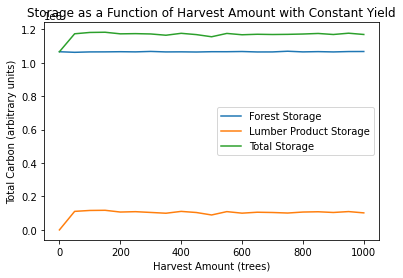

In [ ]:
plt.plot(harvest, totalYieldStorageByAmt, label="Forest Storage")
plt.plot(harvest, totalYieldProductStorageByAmt, 
         label="Lumber Product Storage")
plt.plot(harvest, totalYieldUnitsByAmt, label="Total Storage")
plt.xlabel('Harvest Amount (trees)') 
plt.ylabel('Total Carbon (arbitrary units)')
plt.title("Storage as a Function of Harvest Amount with Constant Yield")
plt.legend()
plt.show()

In [ ]:
#test case, random fake data for plotting storage as a 
#function of harvest amount
totalEffortStorageByAmt = list()
totalEffortProductStorageByAmt = list()
totalEffortUnitsByAmt = list()
effort = np.arange(0,1,0.01)
for x in effort:
  cali = Forest()
  cali.addSpecies(douglas_fir)
  cali.addTrees(ages,common_name='Douglas-Fir') #same trees at same start ages
  cali.ageForest(13)
  cali.harvestRates(1, x, effort=True)
  totalEffortStorageByAmt.append(cali.storage)
  totalEffortProductStorageByAmt.append(cali.productStorage)
  totalEffortUnitsByAmt.append(cali.productStorage+cali.storage)

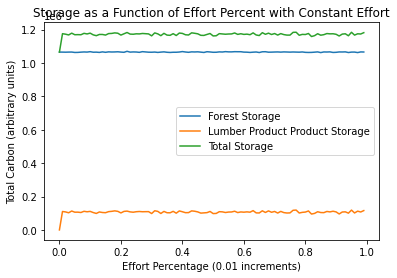

In [ ]:
plt.plot(effort, totalEffortStorageByAmt, label="Forest Storage")
plt.plot(effort, totalEffortProductStorageByAmt, 
         label="Lumber Product Product Storage")
plt.plot(effort, totalEffortUnitsByAmt, label="Total Storage")
plt.xlabel('Effort Percentage (0.01 increments)') 
plt.ylabel('Total Carbon (arbitrary units)')
plt.title("Storage as a Function of Effort Percent with Constant Effort")
plt.legend()
plt.show()